In [1]:
#import face_recognition  #not used in this project yet
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd
import os
import csv
import numpy as np
import random as rd

import time
import threading

from fastai.vision import *
from fastai.metrics import error_rate

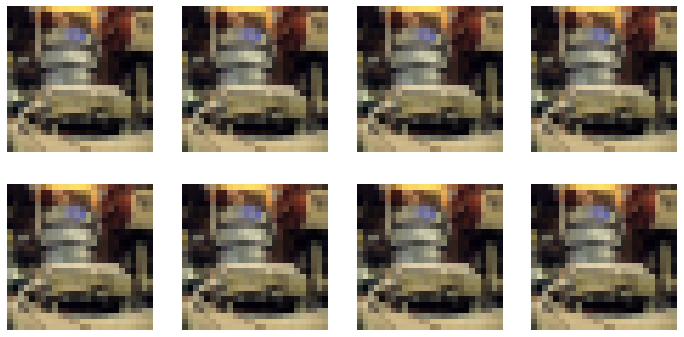

In [33]:
tfms = zoom_crop(scale=(1), do_rand=True,p=1)

def get_ex(): return open_image('./data/numdet/numdet_preparation/img_background/test_ladlecar_1.jpg')

#def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
#plots_f(2, 4, 12, 6, size=26)



In [114]:
rd.seed(17)

#preparation of list of number-images:
path_num_all = Path("./data/mnist/mnist_png")

#background pictures
path_bg_source = Path("./data/numdet/numdet_preparation/img_bg_source")
path_bg_out = Path("./data/numdet/numdet_preparation/img_bg_out")

#output
path_mix_all = Path("./data/numdet/numdet_png/all")
path_mix_train = Path("./data/numdet/numdet_png/training")
path_mix_test = Path("./data/numdet/numdet_png/testing")

#path_files = [x for x in path_num_train.iterdir() if x.is_dir()]
path_files_num_all = list(path_num_all.glob('**/*.png'))

#list of all path of all num images
path_files_bg_all = list(path_bg_source.glob('**/*.*'))

tfms_bg = get_transforms()

def get_bg_slices (file_path,win_width,win_height,reduce=1,**kwargs):
    rows, cols, width, height = 2,4,20,10
    
    bg_img = open_image(file_path)
    bg_img = bg_img.apply_tfms(tfms_bg[0])
    h0,w0 = int(bg_img.size[0]//reduce),int(bg_img.size[1]//reduce)
    bg_img = bg_img.resize((3,h0,w0))
    k_w = w0//win_width
    k_h = h0//win_height
    out_imgs=[]
    for i_w in range(k_w):
        for i_h in range(k_h):
             out_imgs.append(Image(bg_img.data[:,i_h*win_height:i_h*win_height + win_height,i_w*win_width:i_w*win_width + win_width]))
    return ImageList(out_imgs)


#out_bg_imgs = get_bg_slices(path_files_bg_all[1],28,28,reduce=1)



#tfms = #get_transforms(max_rotate=25)
tfms_num = [rand_resize_crop(30,ratios=(1,3))]
#tfms= [crop_pad(row_pct = 0.0, col_pct = 0.1),rotate(degrees=30, p=0.5)]

def get_num_image(file_path):
    out_img = open_image(file_path)
    return out_img.apply_tfms(tfms_num[0],size = 28)

def plots_f(rows, cols, width, height, **kwargs):
    [num_img.apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(rows,cols,figsize=(width,height))[1].flatten())]

def get_merged_image(img_num,img_bg):
    
    out_tensor = (img_num.data*0.7) + img_bg.data
    return Image(np.clip(out_tensor, 0, 1))
    
    
#plots_f(2, 4, 12, 6, size=28 )


    
def make_mix_num_bg (count,save_dir, proportion=0.5):
    #num_img_trsf
    out_img_counter = 0
    num_index = 0
    bg_index = 0
    for bg_i in path_files_bg_all:
        out_bg_imgs = get_bg_slices(bg_i,28,28,reduce=1)
        bg_len = len(out_bg_imgs.items)
        for i in out_bg_imgs.items:
            if num_index<len(path_files_num_all):
                num_img_trsf = get_num_image(path_files_num_all[num_index])
                num_label = path_files_num_all[num_index].parent.name
                if rd.random()>proportion:
                    merged_image = get_merged_image(num_img_trsf,i)
                    file_name = "1/mix_%s_%s.jpg"%(num_label,out_img_counter)
                    merged_image.save(save_dir/file_name)
                else:
                    merged_image = i
                    file_name = "0/!mix_no_%s.jpg"%(out_img_counter)
                    merged_image.save(save_dir/file_name)
                num_index = num_index + 1
                out_img_counter = out_img_counter + 1
            else:
                num_index = 0
                
            if out_img_counter>=count:
                break    
        if out_img_counter>=count:
            break
    
    
make_mix_num_bg(70000,path_mix_all,proportion = 0.5)

0

In [110]:
rd.random()
len(path_files_num_all)

70000

In [220]:
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen
import urllib.request
import urllib
from PIL import Image

import os
import argparse
import sys
import json
import shutil

In [256]:
def get_soup(url,header):
    return BeautifulSoup(urlopen(urllib.request.Request(url,headers=header)),'html.parser')

def main():
    parser = argparse.ArgumentParser(description='Scrape Google images')
    parser.add_argument('-s', '--search', default='bananas', type=str, help='search term')
    parser.add_argument('-n', '--num_images', default=10, type=int, help='num images to save')
    parser.add_argument('-d', '--directory', default='/Users/gene/Downloads/', type=str, help='save directory')
    query = 'bananas'
    max_images = 100
    save_directory = "./data/numdet/numdet_preparation/img_bg_source/"
    image_type="Action"
    query= query.split()
    query='+'.join(query)
    #url="https://www.google.co.in/search?q="+query+"&source=lnms&tbm=isch"
    #url="https://www.google.com/search?q=%D1%81%D1%82%D0%B0%D0%BB%D0%B5%D0%B2%D0%BE%D0%B7&newwindow=1&tbm=isch&source=lnt&tbs=ic:specific,isc:brown"
    url="https://www.google.com/search?newwindow=1&biw=1473&bih=790&tbs=ic%3Aspecific%2Cisc%3Abrown%2Cisz%3Al&tbm=isch&sa=1&ei=_FhgXYLvNMO45OUPvb2PuAE&q=%D0%B7%D0%B0%D0%B2%D0%BE%D0%B4%D1%81%D0%BA%D0%BE%D0%B9+%D1%86%D0%B5%D1%85&oq=%D0%B7%D0%B0%D0%B2%D0%BE%D0%B4%D1%81%D0%BA%D0%BE%D0%B9+%D1%86%D0%B5%D1%85"
    #url="https://www.google.com/search?newwindow=1&biw=1473&bih=790&tbs=ic%3Aspecific%2Cisc%3Abrown&tbm=isch&source=hp&biw=&bih=&ei=0lJgXcPFM-ek5OUP5IuK6AY&q=%D1%86%D0%B5%D1%85&oq=%D1%86%D0%B5%D1%85&"
    header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"}
    soup = get_soup(url,header)
    ActualImages=[]# contains the link for Large original images, type of  image
    for a in soup.find_all("div",{"class":"rg_meta"}):
        link , Type =json.loads(a.text)["ou"]  ,json.loads(a.text)["ity"]
        ActualImages.append((link,Type))
    for i , (img , Type) in enumerate( ActualImages[0:max_images]):
        try:
            #req = urllib.request.Request(img, headers={'User-Agent' : header})
            req = requests.get(img,stream=True, headers=header)
            if len(Type)==0:
                #f = open(os.path.join(save_directory , "img" + "_"+ str(i)+".jpg"), 'wb')
                #req = requests.get(img_url,stream=True, headers=header)
                with open(os.path.join(save_directory , "img" + "_"+ str(i)+".jpg"), 'wb') as out_file:
                    shutil.copyfileobj(req.raw, out_file)
            else :
                #f = open(os.path.join(save_directory , "img" + "_"+ str(i)+"."+Type), 'wb')
                with open(os.path.join(save_directory , "img" + "_"+ str(i)+"."+Type), 'wb') as out_file:
                    shutil.copyfileobj(req.raw, out_file)
            #f.write(raw_img)
            #f.close()
        except Exception as e:
            print("could not load : "+img)
            print(e)
            
            
##usage: python scrapeImages.py --search "cat" --num_images 10 --directory "/Users/gene/Downloads"
main()

could not load : http://%D0%B2%D1%80%D0%B5%D0%BC%D1%8F%D1%80%D0%BE%D1%81%D1%81%D0%B8%D0%B8.%D1%80%D1%84/sites/default/files/styles/big_colorbox/public/node/2916/smrk7116.jpg?itok=l-iJXh-0
encoding with 'idna' codec failed (UnicodeError: label empty or too long)
could not load : x-raw-image:///66802010a0cfb5879570a881e7357cf6c13075932456cb3ddc2c2d96f782ec69
No connection adapters were found for 'x-raw-image:///66802010a0cfb5879570a881e7357cf6c13075932456cb3ddc2c2d96f782ec69'
